<a href="https://colab.research.google.com/github/orenbara/influential_nodes/blob/main/Testing_Cora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a simple example of working with CORA
Used this as basis:
https://graphsandnetworks.com/the-cora-dataset/

# Download and unzip

In [ ]:
import os
import networkx as nx
import pandas as pd
data_dir = os.path.expanduser("/content/finalProject")



# Prepare CORA
Cora consist of 2 files:
1. cora.cites - csv represents the edges (source edge and destination edge)
2. cora.content - tab seperated file:
- Each row coresponds to a paper
- Each column represents a feature related to the paper, with the final column representing the subject/category (label) of the paper.



In [ ]:

# Download the file
!wget -P /content/finalProject https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz

# Extract the file
!tar -xzvf /content/finalProject/cora.tgz -C /content/finalProject


cora_path = "/content/finalProject/cora"
edgelist = pd.read_csv(os.path.join(cora_path, "cora.cites"), sep='\t', header=None, names=["target", "source"])

# Show data set info
edgelist.info()
edgelist

# add a label to represent connection between the targer and source
edgelist["label"] = "cites"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  5429 non-null   int64
 1   source  5429 non-null   int64
dtypes: int64(2)
memory usage: 85.0 KB


GET DATA SET from google drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the folder in Google Drive
cora_path = "/content/drive/MyDrive/FinalProject/CORA_SUBSETS"

# Load the edgelist CSV file
import os
import pandas as pd

year_selected = '1985' #@param  ['1980', '1981', '1982','1983', '1984', '1985','1986', '1987', '1988'] {allow-input: true}


# Correctly read the CSV file with a comma separator
edgelist = pd.read_csv(os.path.join(cora_path, f"cora_gold_subset_{year_selected}.csv"), sep=',', header=0, names=["target", "source"])

# Show data set info
edgelist.info()
print(edgelist)

# Add a label to represent the connection between the target and source
edgelist["label"] = "cites"
print(edgelist.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  1111 non-null   int64
 1   source  1111 non-null   int64
dtypes: int64(2)
memory usage: 17.5 KB
      target  source
0        705     706
1        705     707
2        705     708
3        705     709
4        706     707
...      ...     ...
1106    1526    1531
1107    1527    1531
1108    1528    1531
1109    1529    1531
1110    1530    1531

[1111 rows x 2 columns]
   target  source  label
0     705     706  cites
1     705     707  cites
2     705     708  cites
3     705     709  cites
4     706     707  cites


# Add label
The edgelist is a simple table with the source citing the target. All edges have the same label

In [ ]:
edgelist.sample(frac=1).head(5)

target  source  label
631    1383    1405  cites
991    1400    1412  cites
845    1392    1403  cites
384    1376    1380  cites
300    1373    1409  cites

# Graph
Create directd Graph

In [ ]:
# Convert edgelist to directed graph using nx
Gnx = nx.from_pandas_edgelist(edgelist, edge_attr="label", create_using=nx.DiGraph())

# Set node attribute (attribute name is "label" attribute value is "paper")
nx.set_node_attributes(Gnx, "paper", "label")

# Check that the graph is directed
print(Gnx.is_directed())


True


# Draw Graph

In [ ]:
import matplotlib.pyplot as plt

# Draw the directed graph with arrows
plt.figure(figsize=(100, 100))
nx.draw(Gnx, with_labels=True, node_size=50, node_color='blue', font_size=10, font_color='black', arrows=True)
plt.show()

Diffrent layout

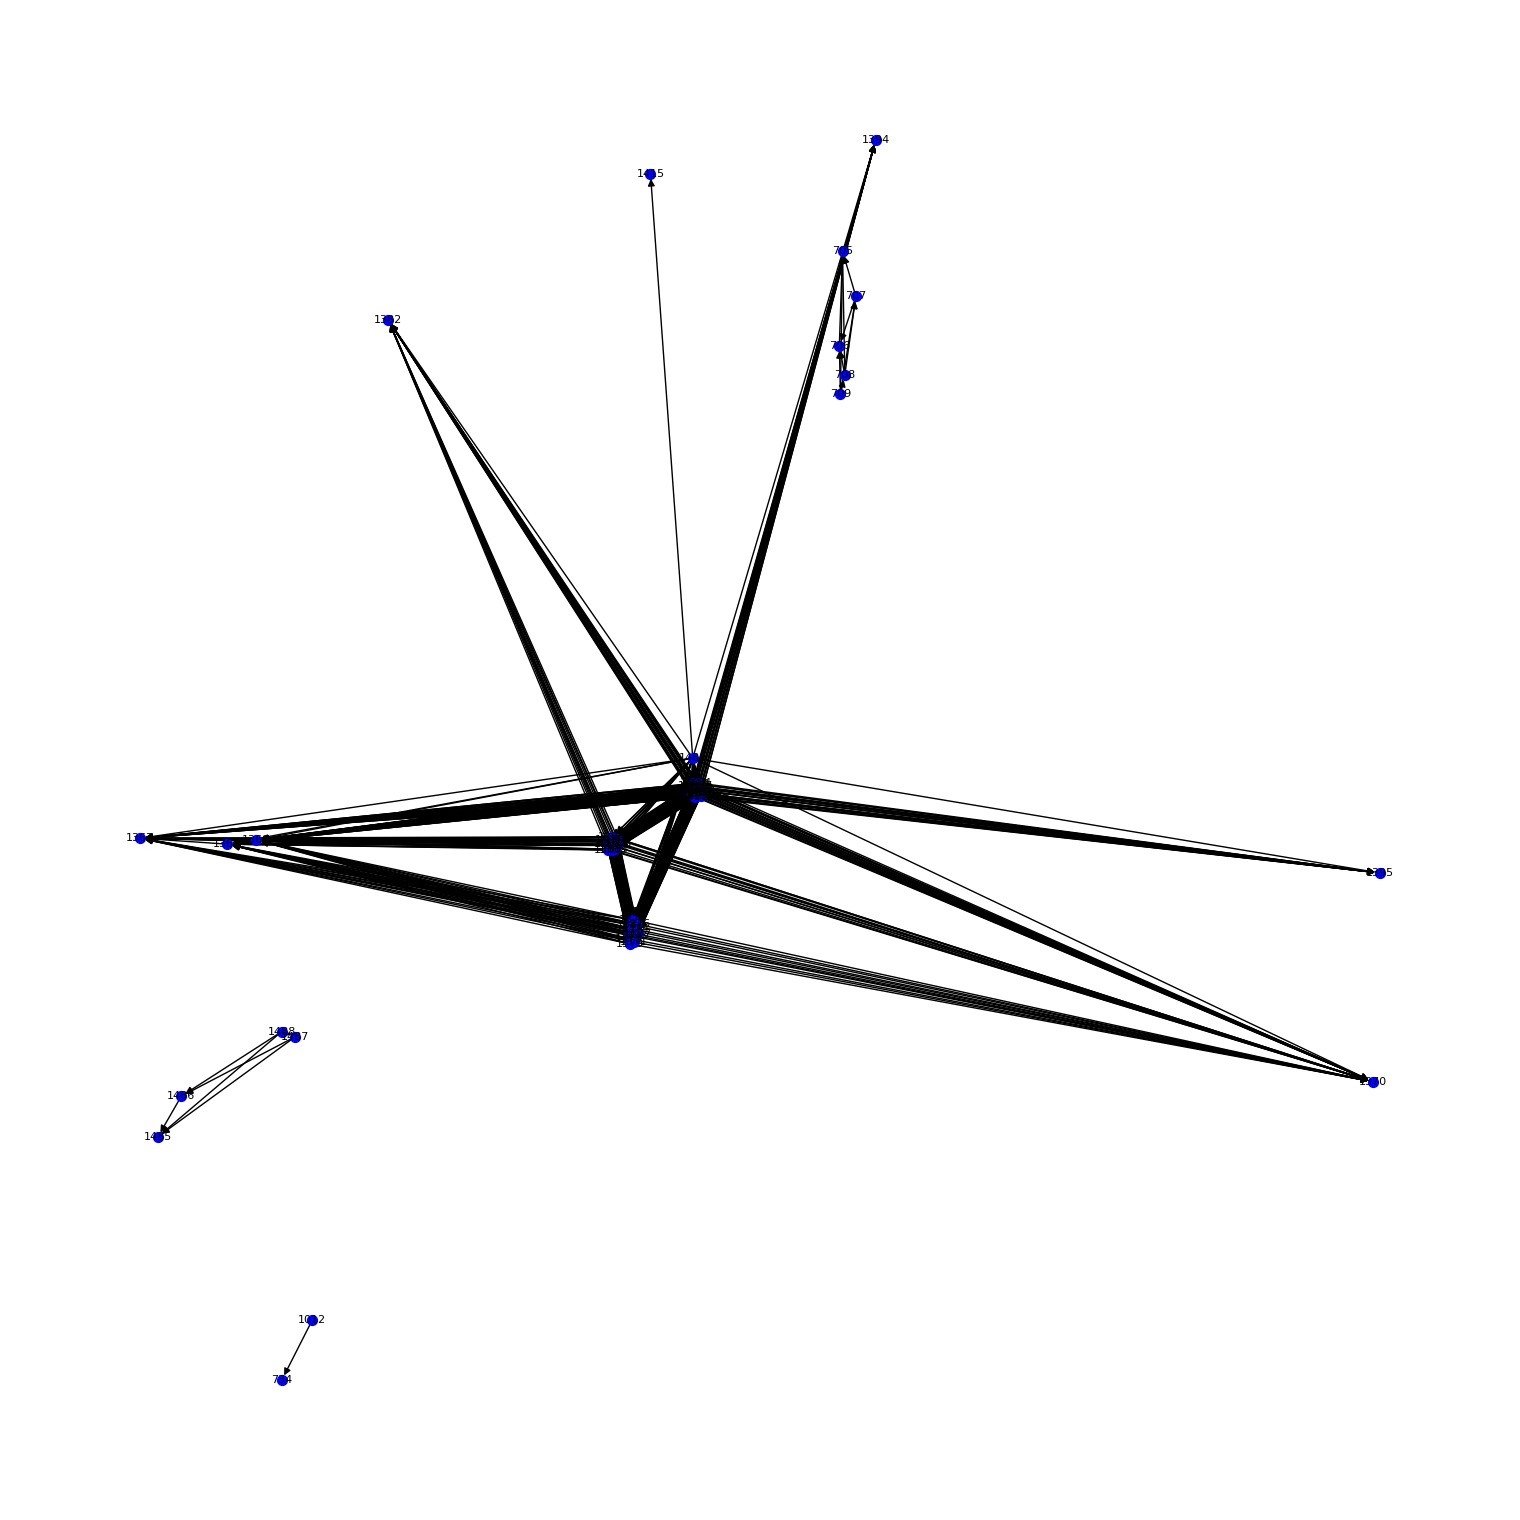

In [ ]:
# Use a spring layout
pos = nx.spring_layout(Gnx)

# Draw the graph with the spring layout
plt.figure(figsize=(15, 15))
nx.draw(Gnx, pos, with_labels=True, node_size=50, node_color='blue', font_size=8, font_color='black', arrows=True)
plt.show()

In [ ]:
# Get atrribute of given node
Gnx.nodes[1103985]

{'label': 'paper'}

# Cora.content
Preparing the second cora file which deals with the bag of words

In [ ]:
# Create Feature Names
feature_names = ["w_{}".format(ii) for ii in range(1433)]
# Concatinate feature_names with subject
column_names =  feature_names + ["subject"]
# Move cora.content to data frame
node_data = pd.read_csv(os.path.join(cora_path, "cora.content"), sep='\t', header=None, names=column_names)

node_data.head(5)

w_0  w_1  w_2  w_3  w_4  w_5  w_6  w_7  w_8  w_9  ...  w_1424  \
31336      0    0    0    0    0    0    0    0    0    0  ...       0   
1061127    0    0    0    0    0    0    0    0    0    0  ...       0   
1106406    0    0    0    0    0    0    0    0    0    0  ...       0   
13195      0    0    0    0    0    0    0    0    0    0  ...       0   
37879      0    0    0    0    0    0    0    0    0    0  ...       0   

         w_1425  w_1426  w_1427  w_1428  w_1429  w_1430  w_1431  w_1432  \
31336         0       1       0       0       0       0       0       0   
1061127       1       0       0       0       0       0       0       0   
1106406       0       0       0       0       0       0       0       0   
13195         0       0       0       0       0       0       0       0   
37879         0       0       0       0       0       0       0       0   

                        subject  
31336           Neural_Networks  
1061127           Rule_Learning  
1106406  Reinforcement_Learning  
13195    Reinforcement_Learning  
37879     Probabilistic_Methods  

[5 rows x 1434 columns]

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Approach number 2: use Python Geometry (PYG)
Here we can also analyze the dataset

In [ ]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='~/somewhere/Cora', name='Cora')

data = dataset[0]
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


# Print the graph

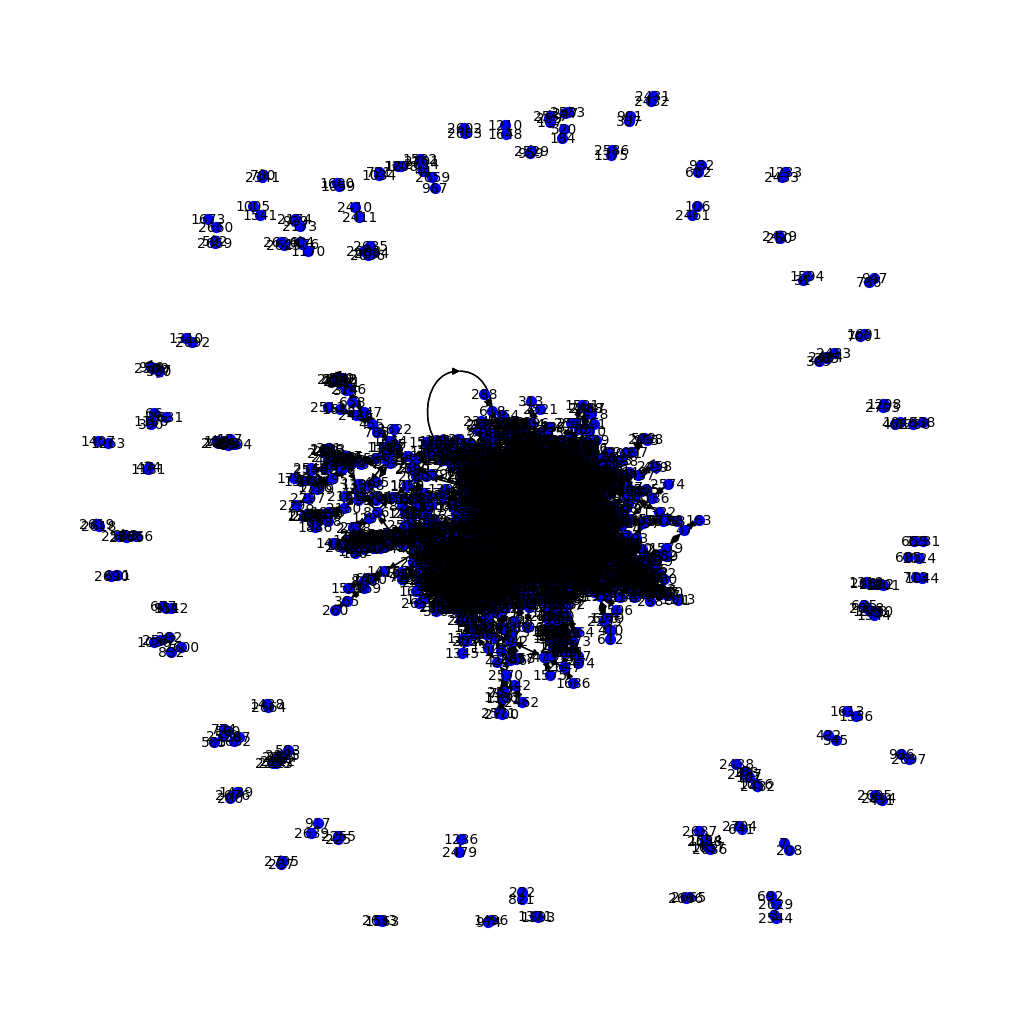

In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

# Assuming 'data' is the original PyTorch Geometric data object
G = to_networkx(data, to_undirected=False)  # Keep the graph directed

# Draw the graph with arrows to indicate direction
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=50, node_color='blue', font_size=10, font_color='black', arrows=True)
plt.show()
